## SPOTIFY BEHAVIOR DATASET

In [277]:
#We will be using spotify's user behavior dataset to see how users interact with the app
#Which age group is the most dominant 
#Where and how long they have been using the app to see if how long users stay around 
#Big Problem : What can we do in order to reatain users and have them continuallously using the app and coming back ?

# IMPORTED PACKAGES NEEDED TO VISUALIZE AND CLEAN DATA 

In [325]:
import pandas as pd 
import kaggle 
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# USED KAGGLE API TO DOWNLOAD DATASET

In [279]:
#Downloaded Dataset File from Kaggle
!kaggle datasets download -d meeraajayakumar/spotify-user-behavior-dataset

spotify-user-behavior-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [280]:
#Extracting zipfle 
zipfile_name = "spotify-user-behavior-dataset.zip"
with zipfile.ZipFile(zipfile_name,'r') as file :
    file.extractall()

In [281]:
data = pd.read_excel("Spotify_data.xlsx")

# GETTING BASIC INFO ABOUT THE DATASET

In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

In [283]:
data.shape

(520, 20)

In [284]:
data.duplicated().sum()

1

In [285]:
# Dropping the duplicate rows and using inplace to make it permanent
data.drop_duplicates(inplace = True)

# DATA EXPLORATION

In [286]:
data

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Wearable devices",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Conversational,Both,Shorter,Ok
516,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Story telling,Both,Shorter,Ok
517,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,Student Plan-Rs 59/month,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,NaN,Story telling,Both,Shorter,Ok
518,20-35,Female,6 months to 1 year,Smartphone,Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Conversational,Both,Longer,Satisfied


In [287]:
data.isna().sum()

Age                              0
Gender                           0
spotify_usage_period             0
spotify_listening_device         0
spotify_subscription_plan        0
premium_sub_willingness          0
preffered_premium_plan         207
preferred_listening_content      0
fav_music_genre                  0
music_time_slot                  0
music_Influencial_mood           0
music_lis_frequency              0
music_expl_method                0
music_recc_rating                0
pod_lis_frequency                0
fav_pod_genre                  147
preffered_pod_format           139
pod_host_preference            140
preffered_pod_duration         128
pod_variety_satisfaction         0
dtype: int64

CHECKING FOR NULL VALUES 

In [288]:
df = pd.DataFrame(data)
df.isnull()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,True,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [289]:
Null = pd.isnull(data["preffered_premium_plan"])
data[Null]

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
5,20-35,Male,More than 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Pop,Night,Uplifting and motivational,Workout session,Others,3,Never,NaN,NaN,NaN,NaN,Ok
6,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Morning,Relaxation and stress relief,Office hours,recommendations,3,Never,NaN,NaN,NaN,NaN,Ok
7,20-35,Female,Less than 6 months,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Social gatherings or parties,leisure time,recommendations,5,Several times a week,Lifestyle and Health,Conversational,Both,Longer,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Morning,Relaxation and stress relief,leisure time,recommendations,3,Rarely,Health and Fitness,Educational,Both,Shorter,Satisfied
502,12-20,Female,6 months to 1 year,Computer or laptop,Premium (paid subscription),No,NaN,Music,Pop,Afternoon,Sadness or melancholy,While Traveling,Others,3,Rarely,Health and Fitness,Interview,unknown Podcasters,Both,Ok
509,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Sadness or melan...","Study Hours, leisure time","recommendations, Others",4,Rarely,Lifestyle and Health,Educational,Well known individuals,Shorter,Ok
513,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Smart speakers...",Free (ad-supported),No,NaN,Music,Kpop,Night,"Relaxation and stress relief, Uplifting and mo...","Study Hours, While Traveling, leisure time","recommendations, Playlists, Others",4,Never,NaN,NaN,NaN,NaN,Ok


FILLED ALL MISSING VALUES AS NONE TO MAKE DATA MORE WORKABLE 

In [290]:
data.fillna('None',inplace= True)

In [291]:
data.isna().sum()

Age                            0
Gender                         0
spotify_usage_period           0
spotify_listening_device       0
spotify_subscription_plan      0
premium_sub_willingness        0
preffered_premium_plan         0
preferred_listening_content    0
fav_music_genre                0
music_time_slot                0
music_Influencial_mood         0
music_lis_frequency            0
music_expl_method              0
music_recc_rating              0
pod_lis_frequency              0
fav_pod_genre                  0
preffered_pod_format           0
pod_host_preference            0
preffered_pod_duration         0
pod_variety_satisfaction       0
dtype: int64

In [292]:
data.nunique()

Age                             5
Gender                          3
spotify_usage_period            4
spotify_listening_device       15
spotify_subscription_plan       2
premium_sub_willingness         2
preffered_premium_plan          5
preferred_listening_content     2
fav_music_genre                11
music_time_slot                 3
music_Influencial_mood         15
music_lis_frequency            35
music_expl_method              20
music_recc_rating               5
pod_lis_frequency               5
fav_pod_genre                  20
preffered_pod_format            5
pod_host_preference             4
preffered_pod_duration          4
pod_variety_satisfaction        5
dtype: int64

# DATA VISUALIZATIONS

In [293]:
sns.set_palette('pastel')
sns.set_style("darkgrid")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Users By Age')

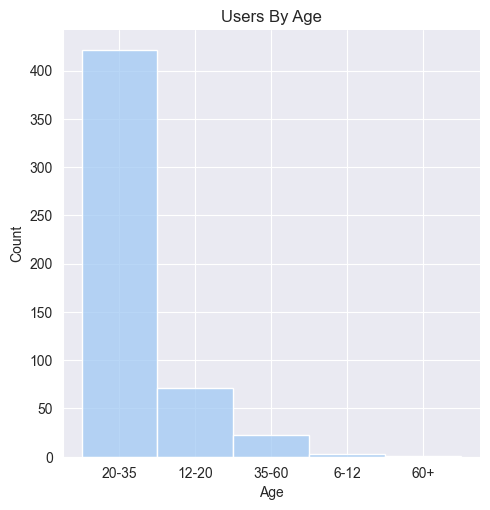

In [294]:
sns.displot(data=data, x = "Age")
plt.title("Users By Age")

<function matplotlib.pyplot.show(close=None, block=None)>

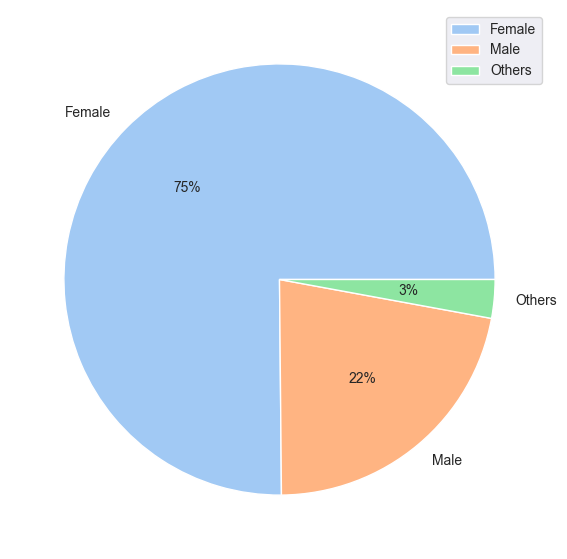

In [295]:
labels = ["Female","Male","Others"]
x = data['Gender'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(x,labels = labels , autopct='%1.0f%%')
plt.legend(labels)
plt.show

[Text(0.5, 1.0, 'Gender distribution according to Age groups')]

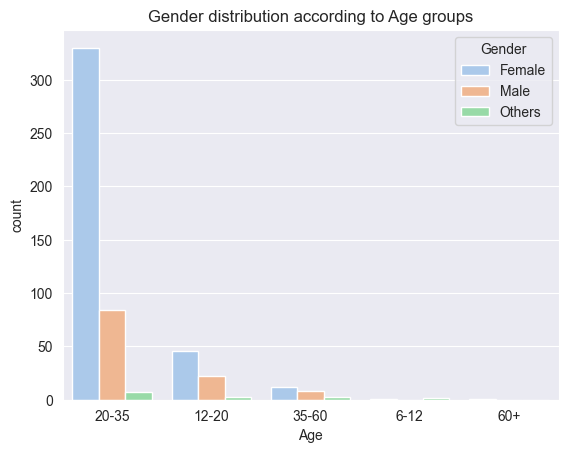

In [296]:
sns.countplot(x='Age',data=data,hue='Gender').set(title="Gender distribution according to Age groups")

CHECKING FOR UNIQUE VALUES TO PUT IN AS LABELS 

In [297]:
data['spotify_usage_period'].unique()

array(['More than 2 years', '6 months to 1 year', '1 year to 2 years',
       'Less than 6 months'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

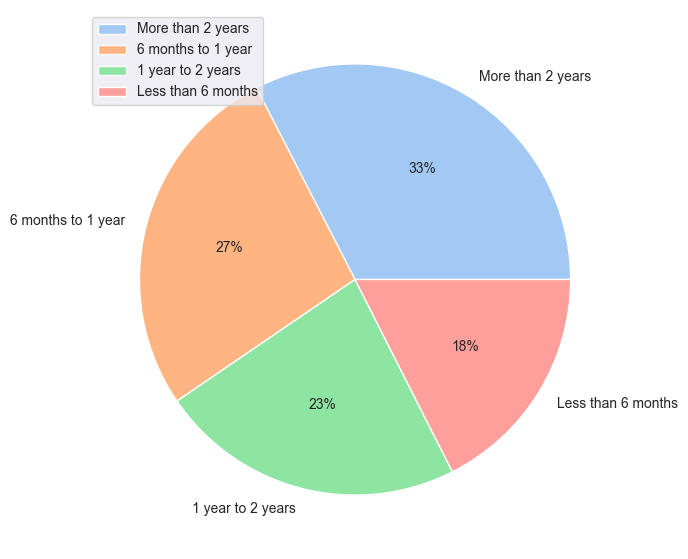

In [323]:
labels = ['More than 2 years', '6 months to 1 year', '1 year to 2 years','Less than 6 months']
x = data['spotify_usage_period'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(x,labels=labels,autopct='%1.0f%%')
plt.legend(labels, loc  = 'upper left')
plt.show


[Text(0.5, 1.0, 'Gender distribution according to Spotify Usage Period')]

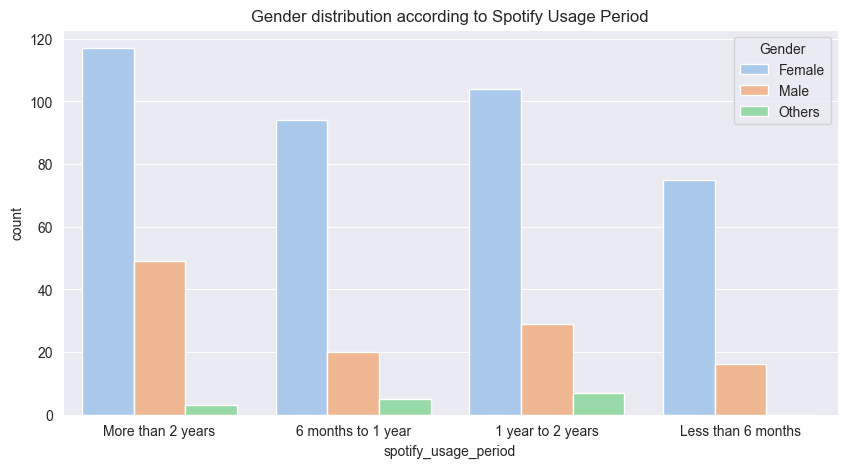

In [299]:
plt.figure(figsize=(10,5))
sns.countplot(x='spotify_usage_period',data=data,hue='Gender').set(title="Gender distribution according to Spotify Usage Period")

[Text(0.5, 1.0, 'Age distribution according to Spotify Usage Period')]

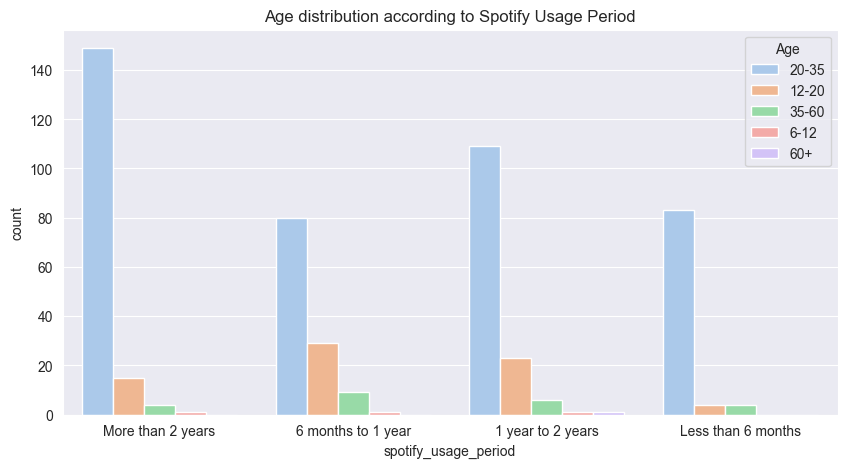

In [300]:
plt.figure(figsize=(10,5))
sns.countplot(x='spotify_usage_period',data=data,hue='Age').set(title="Age distribution according to Spotify Usage Period")

In [301]:
data['spotify_listening_device'].unique()

array(['Smart speakers or voice assistants', 'Computer or laptop',
       'Smartphone, Smart speakers or voice assistants', 'Smartphone',
       'Smartphone, Computer or laptop',
       'Smartphone, Computer or laptop, Smart speakers or voice assistants',
       'Smartphone, Wearable devices',
       'Smartphone, Computer or laptop, Wearable devices',
       'Computer or laptop, Wearable devices',
       'Smartphone, Computer or laptop, Smart speakers or voice assistants, Wearable devices',
       'Wearable devices',
       'Smartphone, Smart speakers or voice assistants, Wearable devices',
       'Computer or laptop, Smart speakers or voice assistants',
       'Computer or laptop, Smart speakers or voice assistants, Wearable devices',
       'Smart speakers or voice assistants, Wearable devices'],
      dtype=object)

In [302]:
data['spotify_listening_device'].value_counts()

spotify_listening_device
Smartphone                                                                              299
Computer or laptop                                                                       54
Smartphone, Computer or laptop                                                           48
Smart speakers or voice assistants                                                       43
Computer or laptop, Smart speakers or voice assistants                                   14
Smartphone, Smart speakers or voice assistants                                           10
Smartphone, Wearable devices                                                              8
Smartphone, Computer or laptop, Smart speakers or voice assistants, Wearable devices      8
Wearable devices                                                                          8
Smartphone, Computer or laptop, Smart speakers or voice assistants                        7
Smartphone, Computer or laptop, Wearable devices       

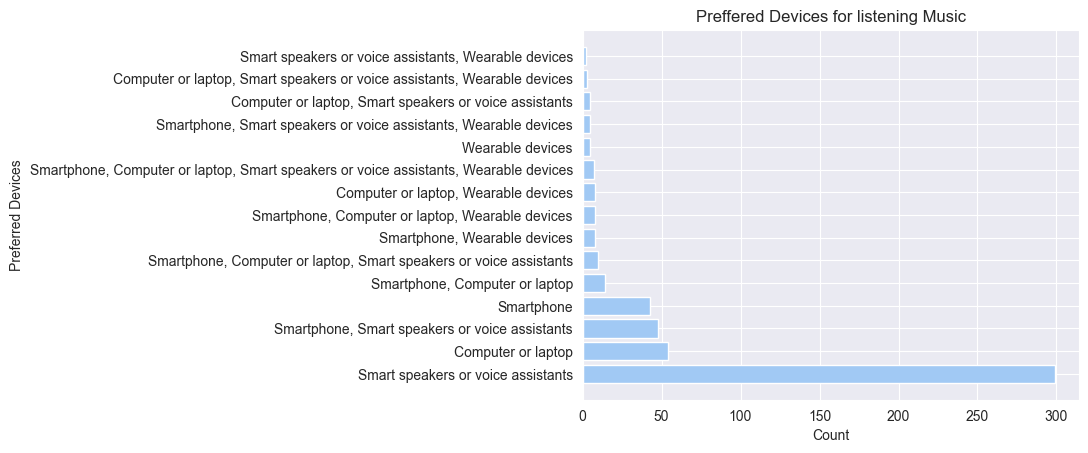

In [344]:
y=data['spotify_listening_device'].value_counts()
x=data['spotify_listening_device'].unique()
plt.barh(x,y)
plt.xlabel('Count')
plt.ylabel('Preferred Devices')
plt.title('Preffered Devices for listening Music')
plt.show()

CHECKING FOR UNIQUE VALUES 


In [361]:
data['spotify_subscription_plan'].unique()

array(['Free (ad-supported)', 'Premium (paid subscription)'], dtype=object)

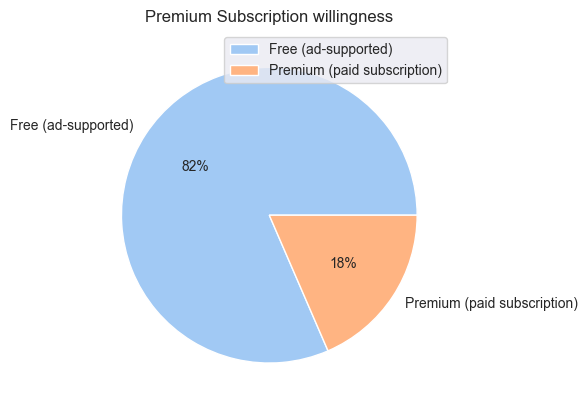

In [305]:
x = data['spotify_subscription_plan'].value_counts()
labels=['Free (ad-supported)','Premium (paid subscription)']
plt.pie(x,labels = labels, autopct='%1.0f%%')
plt.legend(loc = 'upper right')
plt.title('Premium Subscription willingness')
plt.show()

[Text(0.5, 1.0, 'Spotidy Subscription Plan distribution according to Gender')]

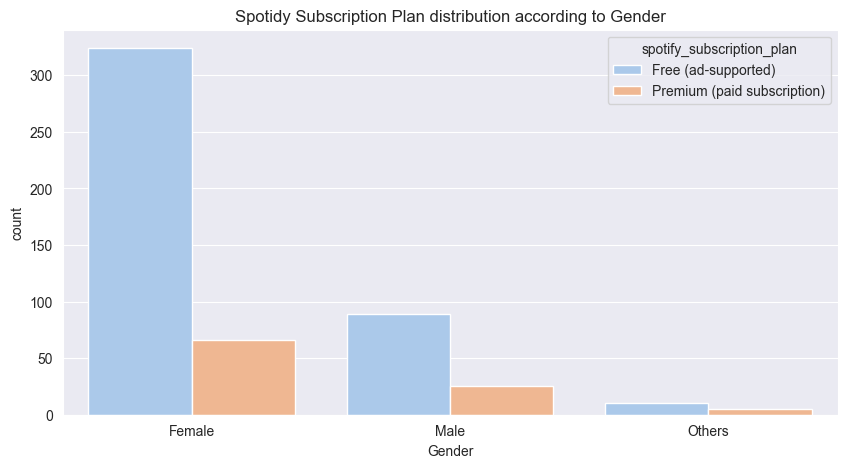

In [306]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=data,hue='spotify_subscription_plan').set(title="Spotidy Subscription Plan distribution according to Gender")

[Text(0.5, 1.0, 'Spotidy Subscription Plan distribution according to Age Range')]

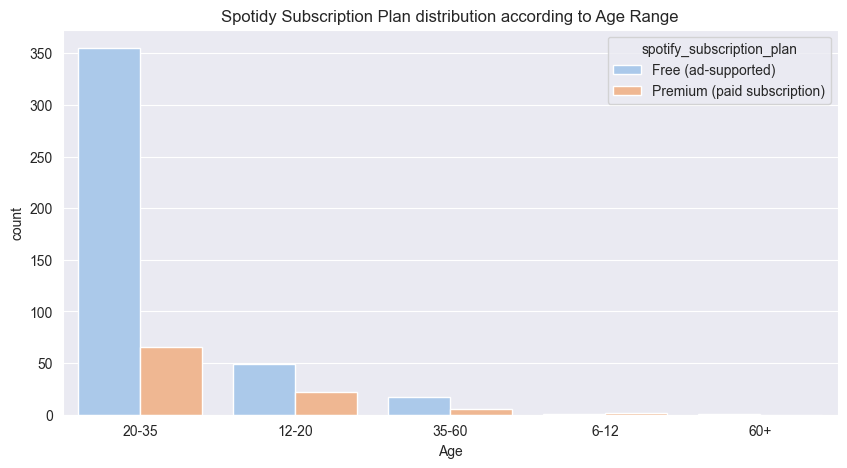

In [307]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age',data=data,hue='spotify_subscription_plan').set(title="Spotidy Subscription Plan distribution according to Age Range")

C

In [365]:
data['premium_sub_willingness'].unique()

array(['Yes', 'No'], dtype=object)

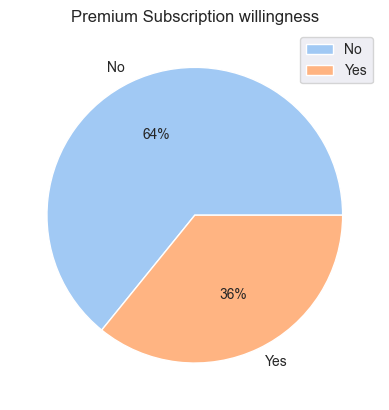

In [309]:
x = data['premium_sub_willingness'].value_counts()
labels=['No','Yes']
plt.pie(x,labels=labels,autopct='%1.0f%%')
plt.legend(loc='best')
plt.title('Premium Subscription willingness')
plt.show()

[Text(0.5, 1.0, 'Preffered Premium Plan')]

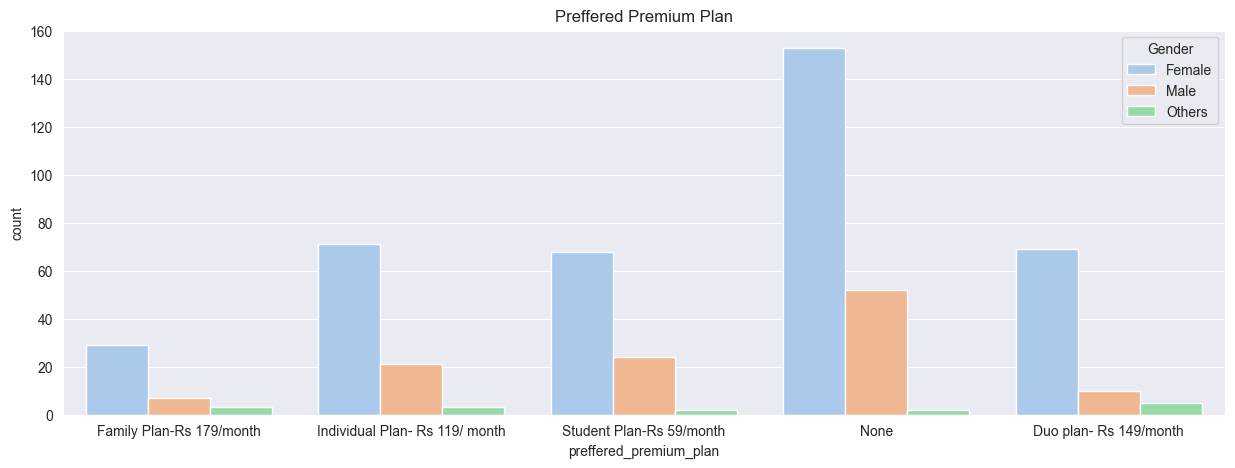

In [310]:
plt.figure(figsize=(15,5))
sns.countplot(x='preffered_premium_plan',data=data,hue='Gender').set(title="Preffered Premium Plan")

CHECKING FOR UNIQUE VALUES 


In [362]:
data['preferred_listening_content'].unique()

array(['Podcast', 'Music'], dtype=object)

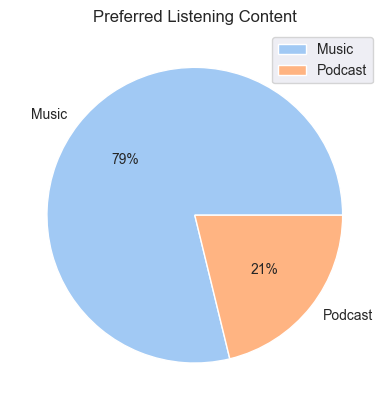

In [312]:
x = data['preferred_listening_content'].value_counts()
labels=['Music','Podcast']
plt.pie(x,labels=labels,autopct='%1.0f%%')
plt.legend(loc='best')
plt.title('Preferred Listening Content')
plt.show()

[Text(0.5, 1.0, 'Preffered Music Genre')]

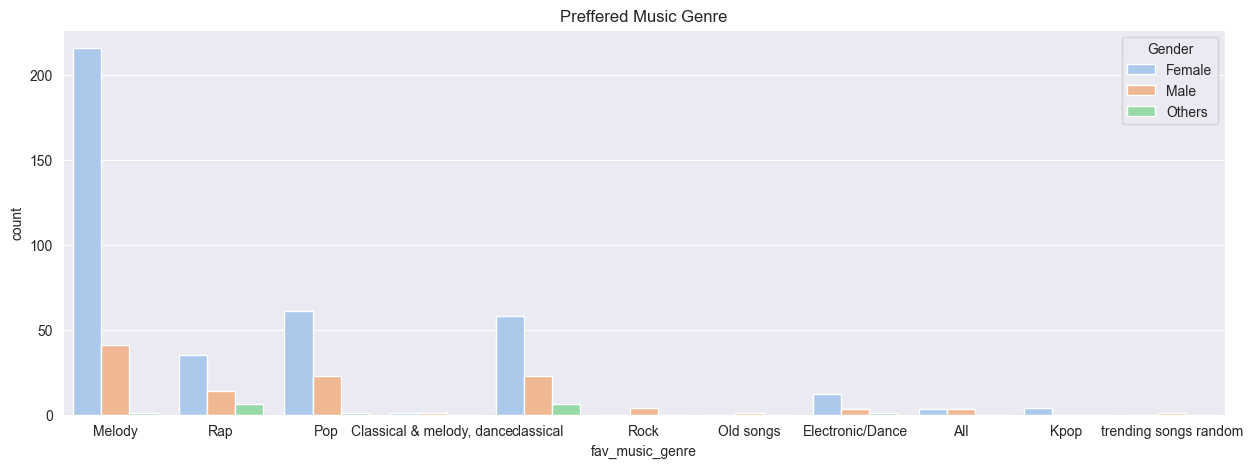

In [313]:
plt.figure(figsize=(15,5))
sns.countplot(x='fav_music_genre',data=data,hue='Gender').set(title='Preffered Music Genre')

CHECKING FOR UNIQUE VALUES TO LABEL 

In [363]:
data['music_time_slot'].unique()

array(['Night', 'Afternoon', 'Morning'], dtype=object)

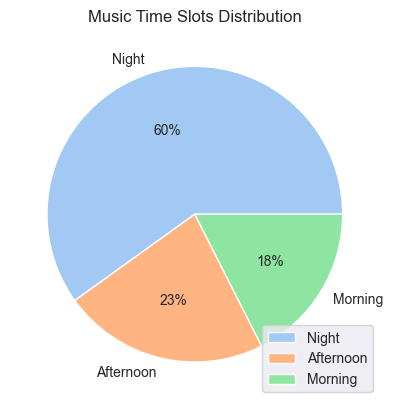

In [314]:
x = data['music_time_slot'].value_counts()
labels=['Night','Afternoon','Morning']
plt.pie(x,labels=labels,autopct='%1.0f%%')
plt.legend(loc='best')
plt.title('Music Time Slots Distribution')
plt.show()

[Text(0.5, 1.0, 'Which type of music is most preferred at what time slot')]

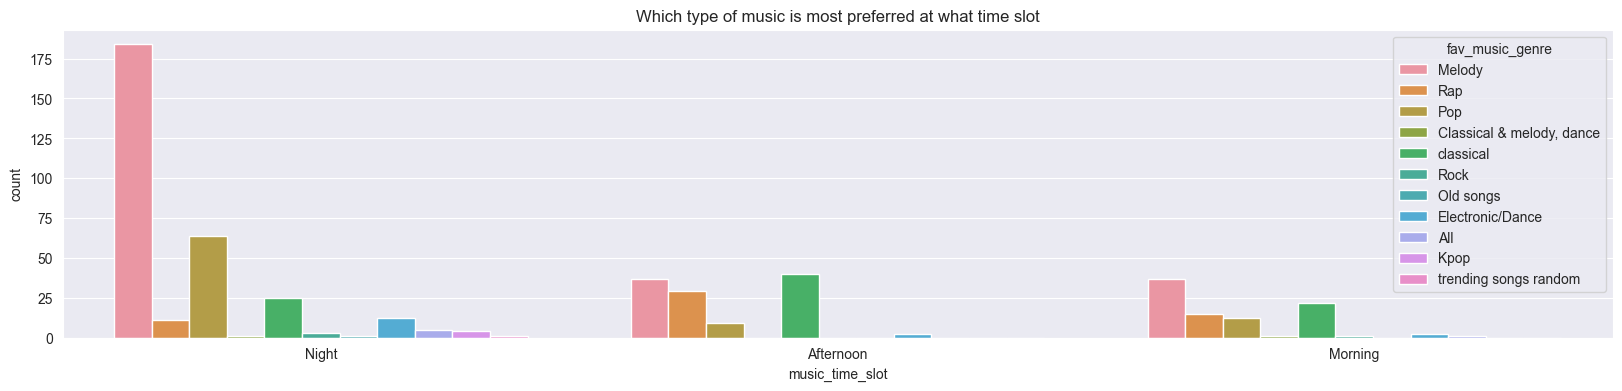

In [324]:
plt.figure(figsize=(20,4))
sns.countplot(x='music_time_slot',data=data,hue='fav_music_genre').set(title="Which type of music is most preferred at what time slot")

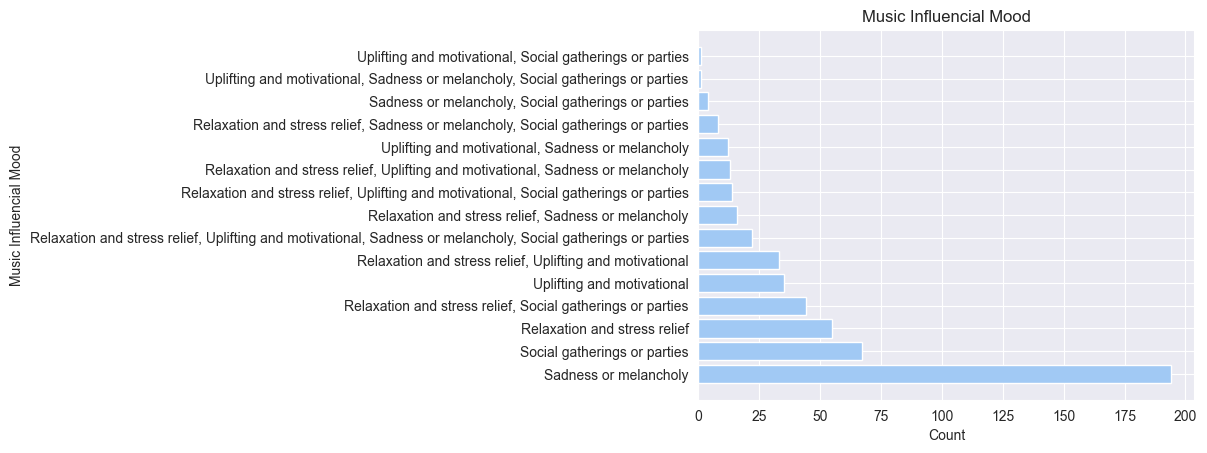

In [343]:
x=df['music_Influencial_mood'].unique()
y=df['music_Influencial_mood'].value_counts().values
plt.barh(x,y)
plt.xlabel('Count')
plt.ylabel('Music Influencial Mood')
plt.title('Music Influencial Mood')
plt.show()

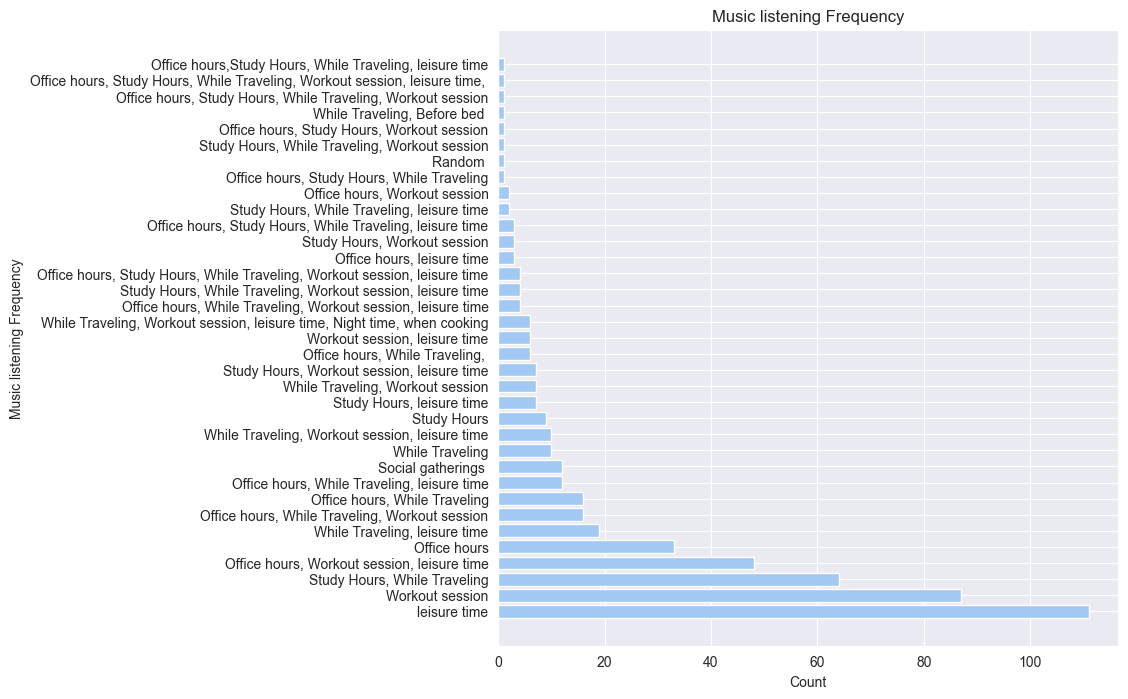

In [342]:
plt.figure(figsize=(8,8))
x=data['music_lis_frequency'].unique()
y=data['music_lis_frequency'].value_counts()
plt.barh(x,y)
plt.xlabel('Count')
plt.ylabel('Music listening Frequency')
plt.title('Music listening Frequency')
plt.show()

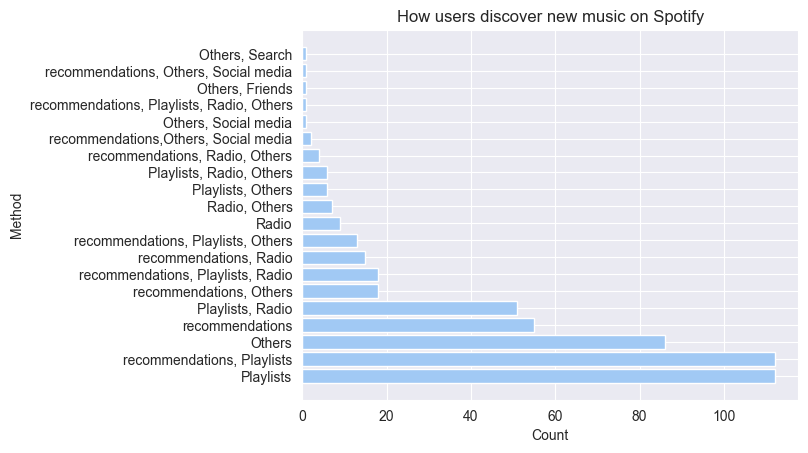

In [341]:
x=data['music_expl_method'].unique()
y=data['music_expl_method'].value_counts().values
plt.barh(x,y)
plt.xlabel('Count')
plt.ylabel('Method')
plt.title('How users discover new music on Spotify')
plt.show()

[Text(0.5, 1.0, 'How users rate the spotify music recommendations')]

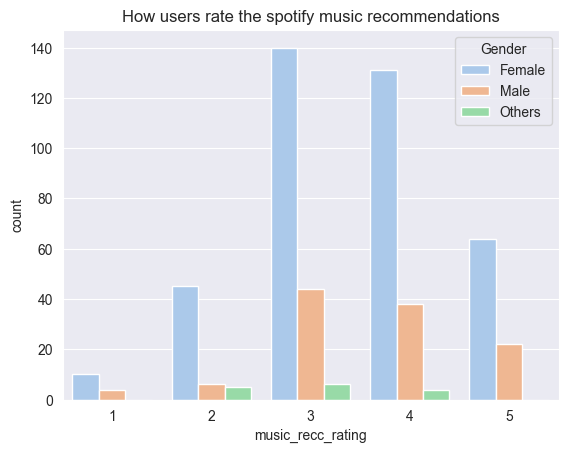

In [319]:
sns.countplot(x='music_recc_rating',data=data,hue='Gender').set(title="How users rate the spotify music recommendations")

CHECKING FOR UNIQUE VALUES TO PUT IT AS LABELS 

In [364]:
data['pod_lis_frequency'].unique()

array(['Daily', 'Several times a week', 'Once a week', 'Never', 'Rarely'],
      dtype=object)

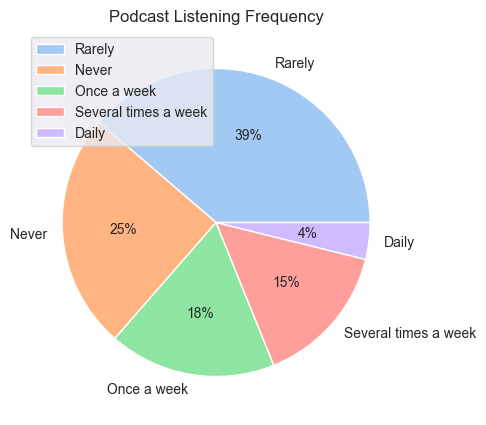

In [321]:
labels=['Rarely','Never','Once a week','Several times a week','Daily']
x = data['pod_lis_frequency'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(x,labels=labels,autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.title('Podcast Listening Frequency')
plt.show()

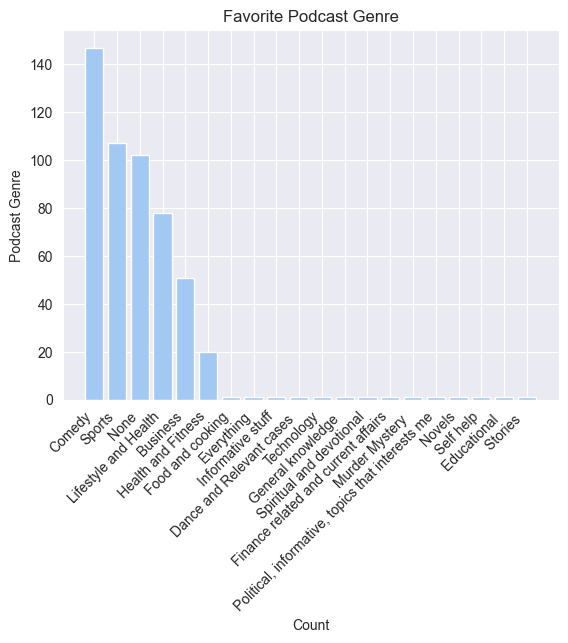

In [348]:
x=data['fav_pod_genre'].unique()
y=data['fav_pod_genre'].value_counts().values
plt.bar(x,y)
plt.xlabel('Count')
plt.xticks(rotation= 45 , ha = 'right')
plt.ylabel('Podcast Genre')
plt.title('Favorite Podcast Genre')
plt.show()

CHECKING FOR UNIQUE COUNTS TO LABEL

In [366]:
data['preffered_pod_format'].unique()

array(['Interview', 'None', 'Story telling', 'Conversational',
       'Educational'], dtype=object)

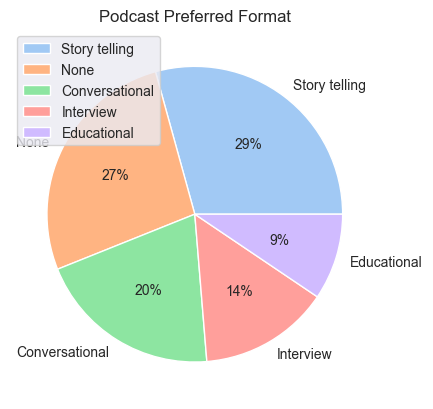

In [353]:
labels=['Story telling','None','Conversational','Interview','Educational']
x = data['preffered_pod_format'].value_counts()
plt.pie(x,labels=labels,autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.title('Podcast Preferred Format')
plt.show()

CHECKING FOR UNIQUE COUNTS TO LABEL 

In [367]:
data['pod_host_preference'].unique()

array(['Both', 'None', 'Well known individuals', 'unknown Podcasters'],
      dtype=object)

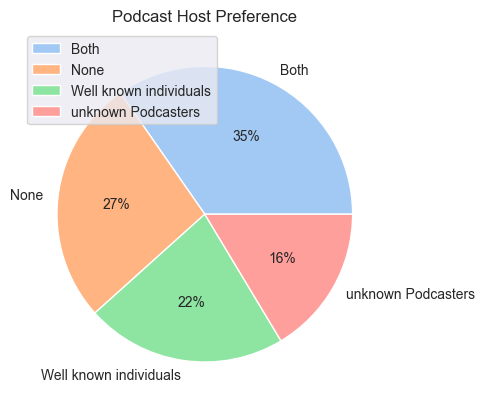

In [357]:
labels=['Both','None','Well known individuals','unknown Podcasters']
x = data['pod_host_preference'].value_counts()
plt.pie(x,labels=labels,autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.title('Podcast Host Preference')
plt.show()

CHECKING FOR UNIQUE COUNTS TO LABEL 

In [368]:
data['preffered_pod_duration'].unique()

array(['Both', 'None', 'Longer', 'Shorter'], dtype=object)

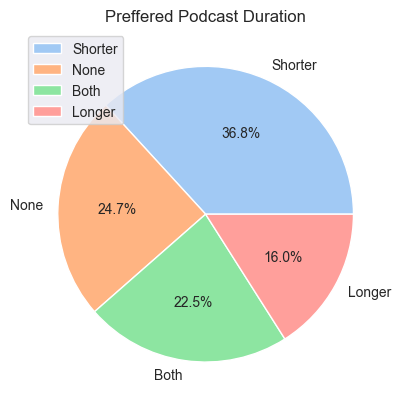

In [358]:
labels=['Shorter','None','Both','Longer']
x = data['preffered_pod_duration'].value_counts()
plt.pie(x,labels=labels,autopct='%1.1f%%')
plt.legend(loc='upper left')
plt.title('Preffered Podcast Duration')
plt.show()

CHECKING FOR UNIQUE COUNTS TO LABEL 

In [369]:
data['pod_variety_satisfaction'].unique()

array(['Ok', 'Satisfied', 'Very Satisfied', 'Very Dissatisfied',
       'Dissatisfied'], dtype=object)

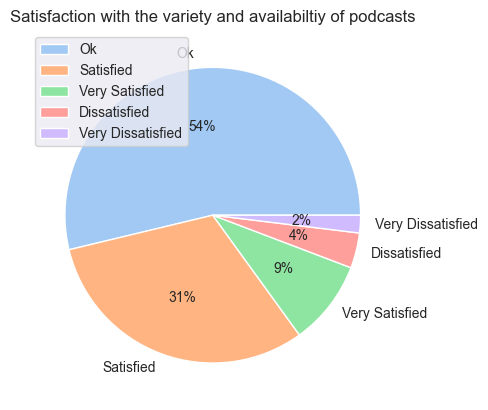

In [370]:
labels=['Ok','Satisfied','Very Satisfied','Dissatisfied','Very Dissatisfied']
x = data['pod_variety_satisfaction'].value_counts()
plt.pie(x,labels=labels,autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.title('Satisfaction with the variety and availabiltiy of podcasts')
plt.show()

1. Based on the data above we can see a majority of the user base are people between the ages of 20-35 
2. We can see that a majority of people perfer to use a free version and also are not that willing to pay for a premium subscription, which means there needs to be more incentive for people to want to pay
3. For those willing to pay for a premium plan there isn't a clear preference
4. We can also see that spotify's usage varies and is a bit inconsistent, ideally we would like to hold on to users as long as possible 
5. The majority of feedback are from females 
6. Most people prefer to listen to music over podcast 
7. Podcast are also rarely or almost never listened too 
8. The most preferred music genre is melody 
9. The most common reason to listen to music is for relaxation and stress relief 
10. Traveling is one of the most frequent reasons for why people listen to music  
11. Most users also stated that their experience with the app was "ok"


From the dataset above most users rate their spotify experience as ok, prefer to use a free version and no not want to pay for a premium subscription. Spotify's usage is also inconsitent. One of the ways to fix this is to make the premium experience better or at least create more incentive to want premium without putting to many limitions on the free version. Making artist stream exclusively on spotify may also help retain users as they may go where the artist goes.
